In [135]:
%matplotlib notebook
import numpy as np
import sys
sys.path.insert(0,'..')
import emlddmm
from emlddmm import read_data, interp
import dti
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
dti_path = '/home/brysongray/bmap/csh_data/human_ccf/MD922_brainstem/MD922/brainstem_maps/scan1/dki/dki_tensor.nii.gz'


In [3]:
nii = nib.load(dti_path)
for k,v in nii.header.items():
    print(k,v)

sizeof_hdr 348
data_type b''
db_name b'untitled'
extents 16384
session_error 0
regular b'r'
dim_info 0
dim [  4  90 150  60   6   1   1   1]
intent_p1 0.0
intent_p2 0.0
intent_p3 0.0
intent_code 0
datatype 16
bitpix 32
slice_start 0
pixdim [1.  0.4 0.4 0.4 1.  0.  0.  0. ]
vox_offset 0.0
scl_slope nan
scl_inter nan
slice_end 0
slice_code 0
xyzt_units 10
cal_max 0.0
cal_min 0.0
slice_duration 0.0
toffset 0.0
glmax 1
glmin 0
descrip b'MRtrix version: 3.0_RC3-96-g2c350fa9'
aux_file b''
qform_code 1
sform_code 1
quatern_b 0.0
quatern_c 0.0
quatern_d 0.0
qoffset_x 0.4
qoffset_y 0.4
qoffset_z 0.4
srow_x [0.4 0.  0.  0.4]
srow_y [0.  0.4 0.  0.4]
srow_z [0.  0.  0.4 0.4]
intent_name b''
magic b'n+1'


<IPython.core.display.Javascript object>


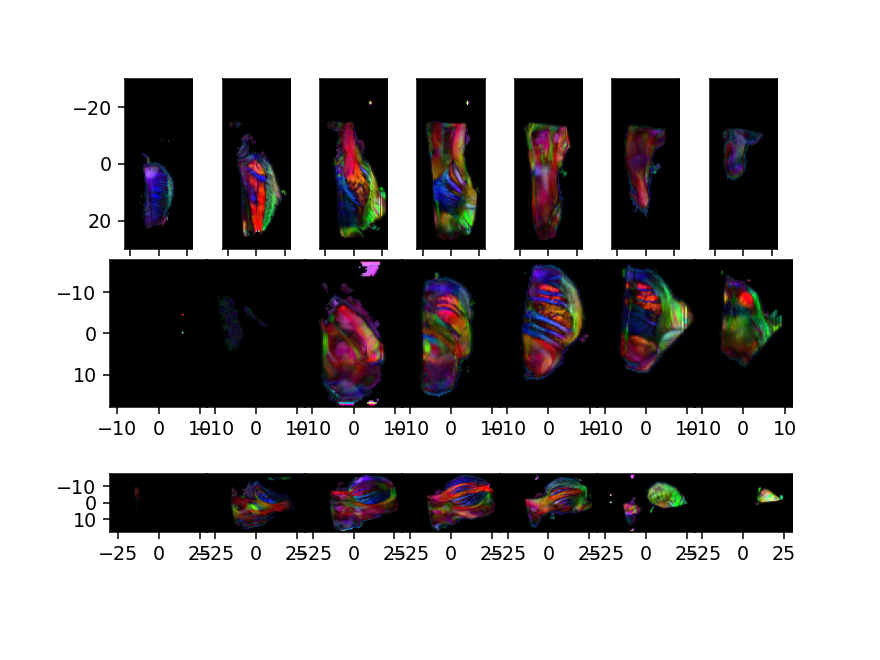

(90, 150, 60, 3)


In [4]:
# read dti
xT, T = dti.read_dti(dti_path)
dti_rgb = dti.visualize(T,xT, n_slices=7)
dti_rgb = dti_rgb.transpose(1,2,3,0)
print(dti_rgb.shape)
plt.savefig("brainstem_rgb.png")

In [5]:
rgb_nib = nib.Nifti1Image(dti_rgb, np.eye(4))
nib.save(rgb_nib, 'images/brainstem_rgb.nii')

In [136]:
from skimage.transform import resize

def plot_quiver(v, overlay, density=0.5, scale=1):
    # plot directions as vector field
    fig = plt.figure(frameon=False, figsize=(8,8))
    # scale image
    vmax = np.quantile(overlay, 0.99, axis=(0,1))
    vmin = np.quantile(overlay, 0.01, axis=(0,1))
    overlay = (overlay-vmin)/(vmax-vmin)
    overlay[overlay>1] = 1.0
    overlay[overlay<0] = 0.0
    v_ = resize(v, (v.shape[0]*density, v.shape[1]*density, v.shape[2]), anti_aliasing=True)
#     theta_ = resize(theta, (theta.shape[0]*density, theta.shape[1]*density), anti_aliasing=True)
    x,y = np.meshgrid(np.arange(v_.shape[1]), np.arange(v_.shape[0])[::-1])
    extent = np.min(x), np.max(x), np.min(y), np.max(y)
    ax = fig.add_subplot(111)
    ax.quiver(x, y, v_[...,1], -1*v_[...,0], angles='xy', scale_units='xy', scale=scale, headwidth=0.01, headlength=0.01)
#     ax.imshow(theta, cmap='hsv', alpha=0.3, interpolation='bilinear', extent=extent)
    ax.imshow(overlay, alpha=0.8, interpolation='bilinear', extent=extent)
    return fig

In [6]:
w,e = np.linalg.eigh(T)
dti_eig = e[...,-1]

In [7]:
dti_eig.shape

(90, 150, 60, 3)

In [10]:
zslice = dti_rgb.shape[0]//2
yslice = dti_rgb.shape[1]//2
xslice = dti_rgb.shape[2]//2
dti_angles = np.arctan(dti_eig[:,:,xslice,0]/dti_eig[:,:,xslice,1])
dti_angles = np.nan_to_num(dti_angles)
dti_angles = np.where(dti_angles < 0, dti_angles + np.pi, dti_angles) # make between 0 and pi
print(f'dti_angles are between: {np.min(dti_angles)} and {np.max(dti_angles)}')

dti_angles are between: 0.0 and 3.140468613517662


In [11]:
print(dti_angles.shape)
print(dti_eig.shape)
print(dti_rgb.shape)

(90, 150)
(90, 150, 60, 3)
(90, 150, 60, 3)


In [141]:
xslice

30

<IPython.core.display.Javascript object>


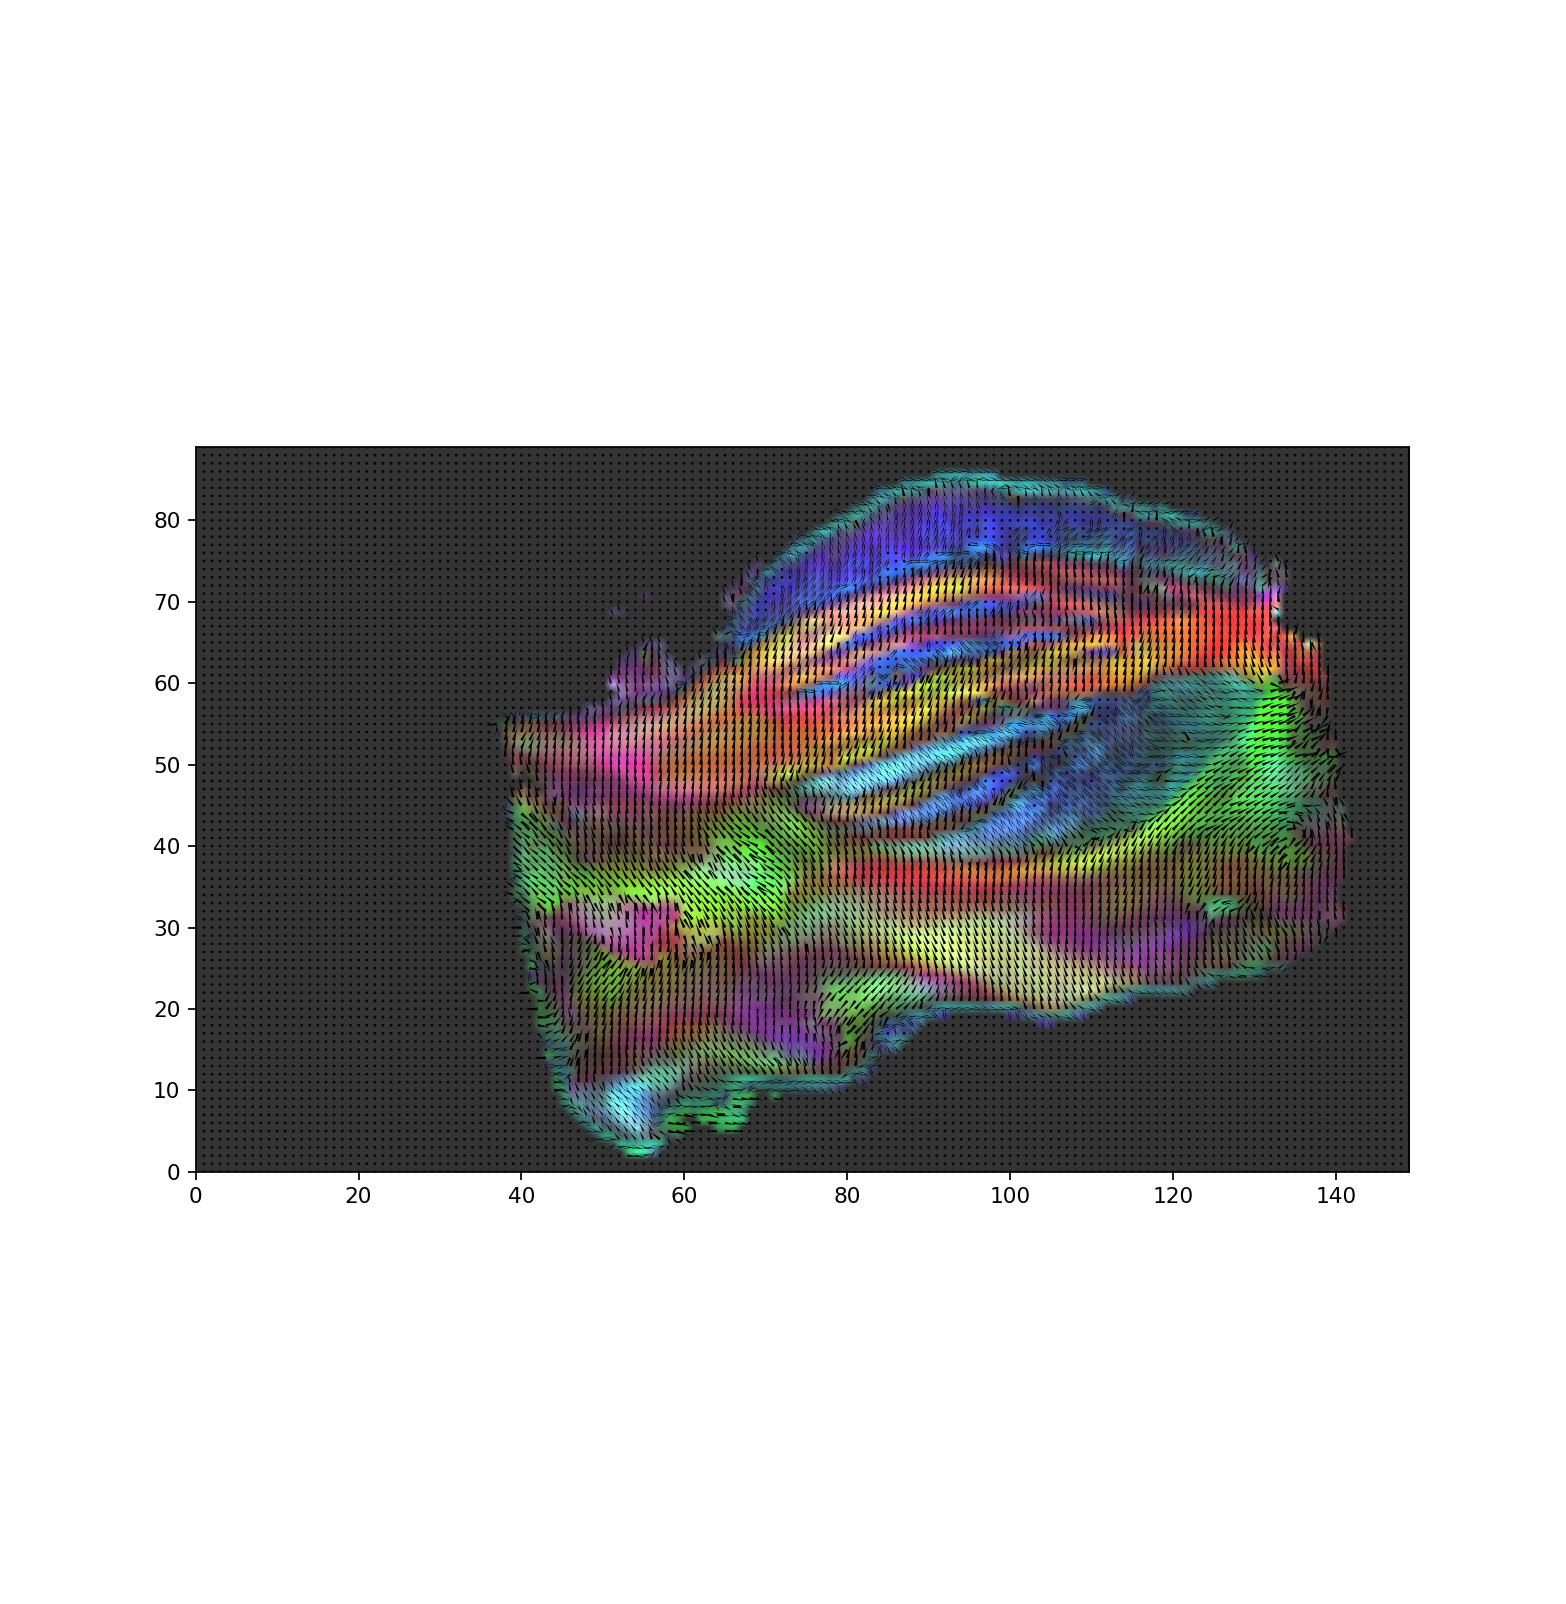

In [139]:
v = dti_eig[:,:, xslice, :2]
# v = dti_eig[zslice,:,:,1:]

to_show = dti_rgb[:,:, xslice,:]
# to_show = dti_rgb[zslice]

quiverplot = plot_quiver(v, to_show, density=1, scale=0.6)

In [140]:
plt.savefig('/home/brysongray/diffusion_analyisis/notebooks/brainstem_angles_zy')

<IPython.core.display.Javascript object>


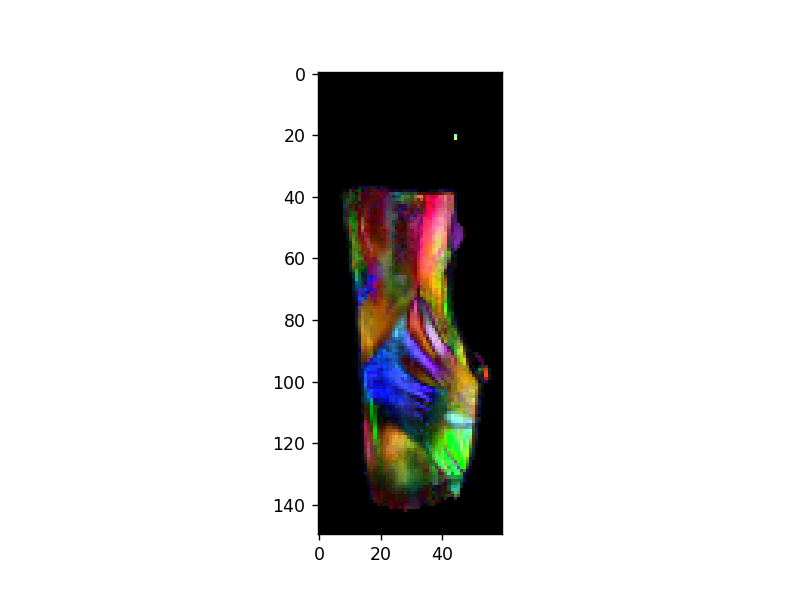

In [124]:
plt.figure()
# img = dti_rgb[:,:,xslice,:]
img = dti_rgb[zslice]
# scale image
vmax = np.quantile(img, 0.99, axis=(0,1))
vmin = np.quantile(img, 0.01, axis=(0,1))
img = (img-vmin)/(vmax-vmin)
img[img>1] = 1.0
img[img<0] = 0.0
plt.imshow(img)

In [49]:
A = np.array([[4,-5],[2,-3]])

In [27]:
w,v = np.linalg.eig(A)

In [28]:
print(w)
print(v)

[ 2. -1.]
[[0.92847669 0.70710678]
 [0.37139068 0.70710678]]


In [62]:
print(A)

[[ 4 -5]
 [ 2 -3]]


In [73]:
# B = np.copy(A)
B = np.flip(A, 1)

In [74]:
print(B)

[[-5  4]
 [-3  2]]


In [75]:
print(A)

[[ 4 -5]
 [ 2 -3]]


In [76]:
w,v = np.linalg.eig(B)
print(w)
print(v)

[-2. -1.]
[[-0.8        -0.70710678]
 [-0.6        -0.70710678]]


In [87]:
H = np.array([[2,3],[3,4]])

In [88]:
np.linalg.eig(H)

(array([-0.16275197,  6.16275197]),
 array([[-0.81118135, -0.58466644],
        [ 0.58479468, -0.81127379]]))

In [89]:
np.linalg.eigh(H)

(array([-0.16322636,  6.16322636]),
 array([[-0.81121296,  0.58475083],
        [ 0.58475083,  0.81121296]]))

In [91]:
dti_angles.shape

(90, 150)

In [114]:
theta = np.copy(dti_angles)
print(theta.shape)
patch_size = 4
i = theta.shape[0]
j = theta.shape[1]
while i%patch_size != 0:
        i -= 1
while j%patch_size != 0:
        j -= 1
theta = theta[:i,:j].reshape((i//patch_size,j//patch_size,patch_size,patch_size))

print(theta.shape)

(90, 150)
(22, 37, 4, 4)


In [115]:
print(i,j)

88 148


In [129]:
theta = np.copy(dti_angles)
print(theta.shape)
tile_size = 4
i, j = [x//tile_size for x in theta.shape]
theta = theta[:i*tile_size,:j*tile_size].reshape((i,j,tile_size*tile_size))

print(theta.shape)

(90, 150)
(22, 37, 16)


In [130]:
theta_norm = np.sum(theta, axis=-1)

In [133]:
theta = theta / theta_norm[...,None]

In [134]:
np.sum(theta[11,16])

1.0